## 一元多项式回归

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### m=1

In [2]:
#读入数据集
D1 = pd.read_csv('D1.csv',header=None, names=['X','Y'])

#将数据集按照80%:20%的比例划分为训练集和测试集
D1_train, D1_test = train_test_split(D1, test_size=0.2)

x_train = D1_train['X']
y_train = D1_train['Y']
x_test = D1_test['X']
y_test = D1_test['Y']

#使用普通最小二乘法估计
class SLR:
    def __init__(self):
        return
    
    def fit(X, y):
        if len(X) == len(y):
            X_mean = np.mean(X)
            y_mean = np.mean(y)
            a1 = 0.0
            a2 = 0.0
            for i in range(len(X)):
                a1 += ((X[i]-X_mean)*(y[i]-y_mean))      #分子
                a2 += np.square(X[i]-X_mean)             #分母
            a = a1/a2
            b = y_mean - a*X_mean
        return a,b

    def predict(X, a, b):
        return a*X+b

print("m=1：")
#确定回归系数和误差值
parameter1 = SLR.fit(list(x_train),list(y_train))
print("回归系数为：",parameter1[0])

#求MAE和RMSE
MAE = []
RMSE = []
y_real = list(y_test)
y_predict =[]
for item in list(x_test):
    z =  SLR.predict(item, parameter1[0], parameter1[1])
    y_predict.append(z)
l = len(y_real)
sum1 = 0
sum2 = 0
for i in range(l):
    sub1 = abs(y_real[i]-y_predict[i])
    sum1 += sub1
MAE1 = sum1/l
MAE.append(MAE1)
print("MAE:", MAE1)
for j in range(l):
    sub2 = (y_real[j]-y_predict[j])**2
    sum2 += sub2
RMSE1 = math.sqrt(sum2)
RMSE.append(RMSE1)
print("RMSE:", RMSE1)

m=1：
回归系数为： -0.08719606002982365
MAE: 1.1270372469167462
RMSE: 2.6099588677515557


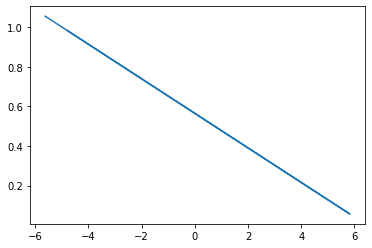

In [3]:
plt.plot(x_test, y_predict)
plt.savefig('./m=1.svg')
plt.show()

### 1<m<5

In [4]:
X1=list(D1['X'])
#计算自变量的2、3、4、5次方并将结果保存在二维数组X中
X=[[],[],[],[]]
a=1
for j in range(4):
    a+=1
    for i in range(len(X1)):
        item=X1[i]**a
        X[j].append(item)
X = np.array(X)

#将自变量保存在数组X中
X = np.insert(X, 0, values=X1, axis=0)
X=X.T
#形成新的数据集D2
X=pd.DataFrame(X)
D2 = X.join(D1['Y'])
#划分数据集为训练集和测试集
D2_train, D2_test = train_test_split(D2, test_size=0.2)
x2_train = D2_train.iloc[:,:-1]
y2_train = D2_train['Y']
x2_test = D2_test.iloc[:,:-1]
y2_test = D2_test['Y']
#将因变量保存在数组Y中
Y=np.array(list(y2_train))
Y=Y.reshape(len(Y), 1)

In [5]:
#自定义求参数的方法
def getpar(data_x, data_y, m):
    x=data_x.iloc[:,:m]
    y=data_y
    ones = np.ones(x.shape[0]).reshape(-1,1)
    x = np.hstack((x,ones))
    w_ = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    print("m=",m,"时：")
    print("系数矩阵为：\n",w_)
    return w_

#自定义求预测值的方法
def predict(x_test, w_):
    x = x_test
    y_pre = np.dot(x, w_)
    return y_pre

In [6]:
#分别求m为2,3,4,5时的参数值，并将结果保存在wb中
w_ = []
 
for i in range(2, 6):
    get = getpar(x2_train, Y, i)
    w_.append(get)

m= 2 时：
系数矩阵为：
 [[-0.05845815]
 [-0.00481203]
 [ 0.76536849]]
m= 3 时：
系数矩阵为：
 [[ 0.76459748]
 [ 0.07773175]
 [-0.04302532]
 [ 0.3022875 ]]
m= 4 时：
系数矩阵为：
 [[ 0.8931465 ]
 [-0.11743012]
 [-0.05670093]
 [ 0.00728729]
 [ 0.87018621]]
m= 5 时：
系数矩阵为：
 [[ 1.65535349e+00]
 [-2.36517653e-02]
 [-1.92825917e-01]
 [ 2.36146820e-04]
 [ 4.20476946e-03]
 [ 6.99474611e-01]]


In [7]:
#分别求m=2,3,4,5时的预测值并将结果保存在列表y_predict中
m=2
y2_predict = []
for i in range(2,6):
    x2=x2_test.iloc[:,:i]
    ones=np.ones((len(x2),1))
    new_x2=np.hstack([x2,ones])
    y2_predict.append(predict(new_x2, w_[i-2]))
    m += 1

In [8]:
#分别求m=2,3,4,5时的MAE和RMSE的值
y2_real=list(y2_test)
l2 = len(y2_real)
sum3 = 0
sum4 = 0
m = 2
n = 2
for i in range(l2):
    for j in range(l2):
        sub3 = abs(y2_real[i]-y2_predict[i][j])
        sum3 += sub3
    mae = float(sum3/l2)
    MAE.append(mae)
    print("m=",m,"时","MAE为:", mae)
    m += 1
for i in range(l2):
    for j in range(l2):
        sub4 = (y2_real[i]-y2_predict[i][j])**2
        sum4 += sub1
    rmse = math.sqrt(sum4)
    RMSE.append(rmse)
    print("m=",n,"时","RMSE为:", rmse)
    n += 1

m= 2 时 MAE为: 0.9026250099257718
m= 3 时 MAE为: 6.511510396636463
m= 4 时 MAE为: 11.872619472098513
m= 5 时 MAE为: 12.871313309610743
m= 2 时 RMSE为: 1.469621799915012
m= 3 时 RMSE为: 2.078359080998969
m= 4 时 RMSE为: 2.5454596253636232
m= 5 时 RMSE为: 2.9392435998300237


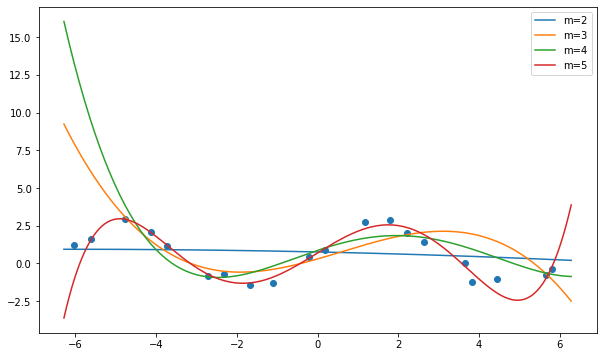

In [9]:
#绘制不同m时的拟合曲线
X1 = np.linspace(-np.pi*2, np.pi*2, 200, endpoint=True).reshape(-1,1)
X2=X1**2
X3=X1**3
X4=X1**4
X5=X1**5
ones=np.ones((len(X1),1))
new_X=np.hstack([X1,X2,X3,X4,X5])
new_X=pd.DataFrame(new_X)
labels=['m=2','m=3','m=4','m=5']
plt.figure(figsize=(10, 6))
plt.scatter(D1['X'],D1['Y'])
for i in range(2,6):
    xx=new_X.iloc[:,:i]
    new_x=np.hstack([xx,ones])
    p = predict(new_x, w_[i-2])
    plt.plot(X1,p,label=labels[i-2])
    plt.legend()
plt.savefig('./fit.svg')

In [10]:
#绘制不同m取值对应不同MAE、RMSE的条形图
MAE

[1.1270372469167462,
 0.9026250099257718,
 6.511510396636463,
 11.872619472098513,
 12.871313309610743]

In [11]:
RMSE

[2.6099588677515557,
 1.469621799915012,
 2.078359080998969,
 2.5454596253636232,
 2.9392435998300237]

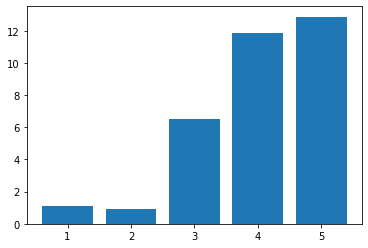

In [15]:
#绘制不同m值对应MAE的条形图
m = list(range(1,6))
plt.bar(m, MAE)
plt.savefig('./1MAE.svg')
plt.show()

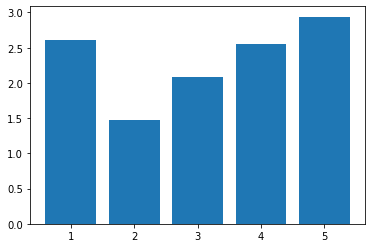

In [13]:
#绘制不同m值对应RMSE的条形图
plt.bar(m, RMSE)
plt.savefig('./RMSE.svg')
plt.show()

## Ridge回归

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [19]:
#读取数据集
dataset = pd.read_csv('new_forestfires.csv')

In [20]:
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,iffire
0,0.750,0.428571,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.750,0.285714,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.750,0.285714,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.875,0.571429,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.875,0.571429,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


正则化参数为： 0.0009765625
正则化参数为： 0.001953125
正则化参数为： 0.00390625
正则化参数为： 0.0078125
正则化参数为： 0.015625
正则化参数为： 0.03125
正则化参数为： 0.0625
正则化参数为： 0.125
正则化参数为： 0.25
正则化参数为： 0.5
正则化参数为： 1
正则化参数为： 2
正则化参数为： 4
正则化参数为： 8
正则化参数为： 16
正则化参数为： 32
正则化参数为： 64
正则化参数为： 128
正则化参数为： 256
正则化参数为： 512
正则化参数为： 1024
正则化参数为： 2048
正则化参数为： 4096
正则化参数为： 8192
正则化参数为： 16384
正则化参数为： 32768
正则化参数为： 65536
正则化参数为： 131072
正则化参数为： 262144
正则化参数为： 524288


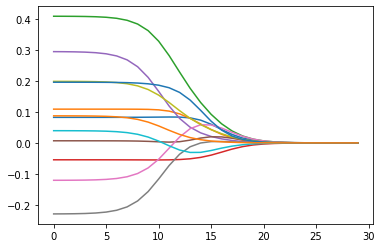

In [23]:
dataset_data = dataset.iloc[:,0:-1]
dataset_target = dataset.iloc[:,-1]
ws = np.zeros((30,12))
for i in range(30):
    print("正则化参数为：",2**(i-10))
    model = Ridge(alpha=2**(i-10))
    model.fit(dataset_data, dataset_target)
    temp = cross_val_score(model,dataset_data, dataset_target, cv=10, scoring='neg_mean_absolute_error')
    ws[i,:]=model.coef_
plt.plot(ws)
plt.savefig('./Ridge.svg')

In [24]:
new_MAE = []
new_RMSE = []
for i in range(5):
    #将数据集按80%:20%划分为训练集和测试集
    dataset_train, dataset_test = train_test_split(dataset, test_size=0.2)
    train_data = dataset_train.iloc[:,0:-1]
    test_data = dataset_test.iloc[:,0:-1]
    train_target = dataset_train.iloc[:,-1]
    test_target = dataset_test.iloc[:,-1]
    #训练模型
    model1 = Ridge(alpha=1024, normalize=True)
    model1.fit(train_data, train_target)
    coef=model1.coef_
    predict_target = model1.predict(test_data)
    print("回归系数",coef)

    #求MAE和RMSE
    real_target=list(test_target)
    l = len(real_target)
    sum5 = 0
    sum6 = 0
    for i in range(l):
        sub = abs(real_target[i]-predict_target[i])
        sum5 += sub
    MAE2 = sum5/l
    new_MAE.append(MAE2)
    print("MAE:", MAE2)
    for j in range(l):
        sub = (real_target[i]-predict_target[i])**2
        sum6 += sub
    RMSE2 = math.sqrt(sum6)
    new_RMSE.append(RMSE2)
    print("RMSE:", RMSE2)

回归系数 [ 7.33737824e-05  1.93934293e-04  3.09748930e-04 -6.56684628e-05
  5.64767158e-04  1.54666490e-04  1.66597486e-04  2.83566470e-04
  2.11029752e-04 -3.74747083e-05  1.03899828e-04  2.68350316e-04]
MAE: 0.49909539125044733
RMSE: 4.863017844951331
回归系数 [ 1.57362625e-04  1.43039012e-04  1.98473682e-04 -8.68077373e-05
  4.23896724e-04  7.51061609e-05  8.75622269e-05  1.04823206e-04
  2.08060266e-04 -1.18208128e-04  1.83640081e-04  2.79542465e-04]
MAE: 0.5002532322283835
RMSE: 5.110707062928346
回归系数 [ 1.23252324e-04  1.12212518e-04  3.27994699e-04 -6.67622456e-05
  6.19550258e-04  1.75559932e-04  1.78154731e-04  3.12818816e-04
  1.55922672e-04 -8.58234000e-07  1.09775572e-04  3.62831686e-04]
MAE: 0.498516843651915
RMSE: 4.987025546716106
回归系数 [ 5.35025384e-05  2.13415455e-04  3.86171623e-04 -7.64613005e-05
  4.37276758e-04  1.17541132e-04  2.11096532e-04  1.08438736e-04
  2.01488126e-04 -1.68216003e-04  1.40567263e-04  2.83106080e-04]
MAE: 0.49910183902265387
RMSE: 5.3354752166746255
回归

In [25]:
new_MAE=np.array(new_MAE)
new_MAE

array([0.49909539, 0.50025323, 0.49851684, 0.49910184, 0.49858825])

In [26]:
new_RMSE=np.array(new_RMSE)

In [27]:
MAE_mean = np.mean(new_MAE)
MAE_mean

0.49911111164201777

In [28]:
RMSE_mean = np.mean(new_RMSE)
RMSE_mean

5.116044929234965

In [29]:
new_MAE = np.append(new_MAE, MAE_mean)
new_RMSE = np.append(new_RMSE, RMSE_mean)

MAE


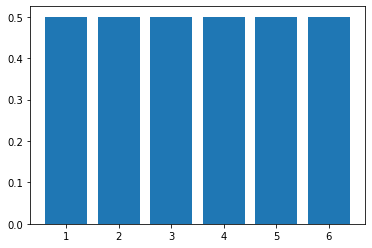

In [32]:
x = [1, 2, 3, 4, 5, 6]
print("MAE")
y1 = new_MAE
plt.bar(x,y1)
plt.savefig('./R_MAE.svg')
plt.show()

RMSE:


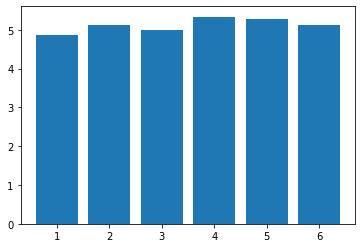

In [34]:
print("RMSE:")
y2 = new_RMSE
plt.bar(x,y2)
plt.savefig('./R_RMSE.svg')
plt.show()